In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
df = pd.read_csv('C:/Users/User/Desktop/python/New folder/prostat.txt', delimiter='\t')
df.head()

,ID,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [177]:
df.drop("ID" ,axis=1, inplace=True)
df.drop("train",axis=1,inplace =True)
data = df.values

<Axes: >

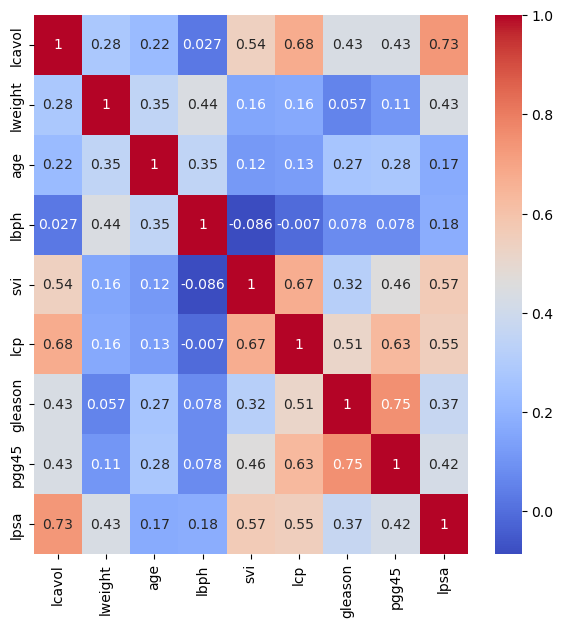

In [179]:

plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

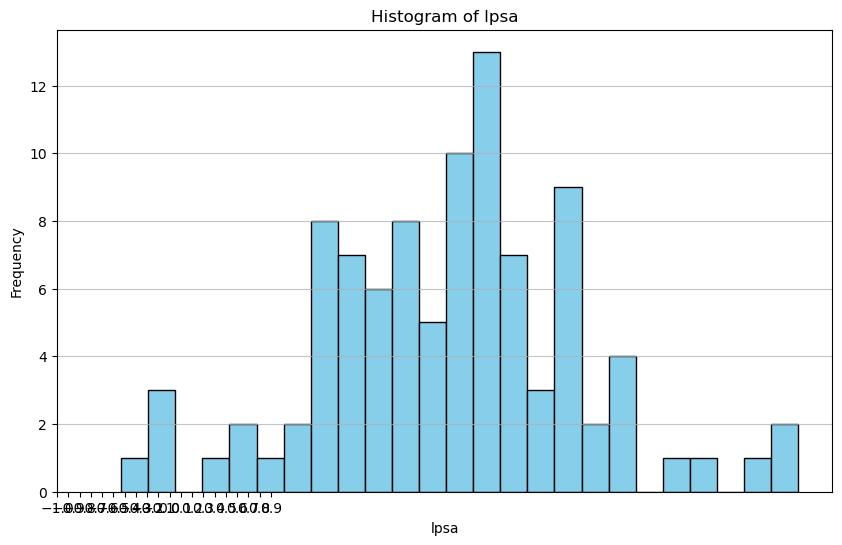

In [181]:

plt.figure(figsize=(10, 6))
plt.hist(df['lpsa'], bins=25, color='skyblue', edgecolor='black')
plt.title('Histogram of lpsa')
plt.xlabel('lpsa')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(-1, 1, 0.1))
plt.show()

In [183]:
import numpy as np

n_bootstrap = 100
n_samples = len(df['lpsa'])

bootstrap_means = []
bootstrap_variances = []

for _ in range(n_bootstrap):
    sample = np.random.choice(df['lpsa'], size=n_samples, replace=True)
    bootstrap_means.append(np.mean(sample))
    bootstrap_variances.append(np.var(sample, ddof=1)) 


mean_bootstrap = np.mean(bootstrap_means)
var_bootstrap = np.mean(bootstrap_variances)

print("estimation of mean:", mean_bootstrap)
print("estimation of variance:", var_bootstrap)

estimation of mean: 2.4906395846701033
estimation of variance: 1.2694432964772238


In [185]:
#linear regression
X = df.iloc[:, 0:8]
y = df.iloc[:,8]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42 )
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')


R^2: 0.6039185108581981


In [187]:
#johnsonsu transform
#from scipy.stats import johnsonsu
#import numpy as np
#import pandas as pd

#data = df['lpsa']  
#a, b, loc, scale = johnsonsu.fit(data)
#data_transformed = johnsonsu(a, b, loc, scale).rvs(size=len(data))

#df['lpsa_transformed'] = data_transformed

#print(df[['lpsa', 'lpsa_transformed']].head())


In [195]:
#Rank-Based Inverse Normal Transformation

from scipy.stats import rankdata, norm
y_ranked = rankdata(df['lpsa'], method='average')
y_transformed = norm.ppf((y_ranked - 0.5) / len(df['lpsa']))
df['y_transformed'] = y_transformed


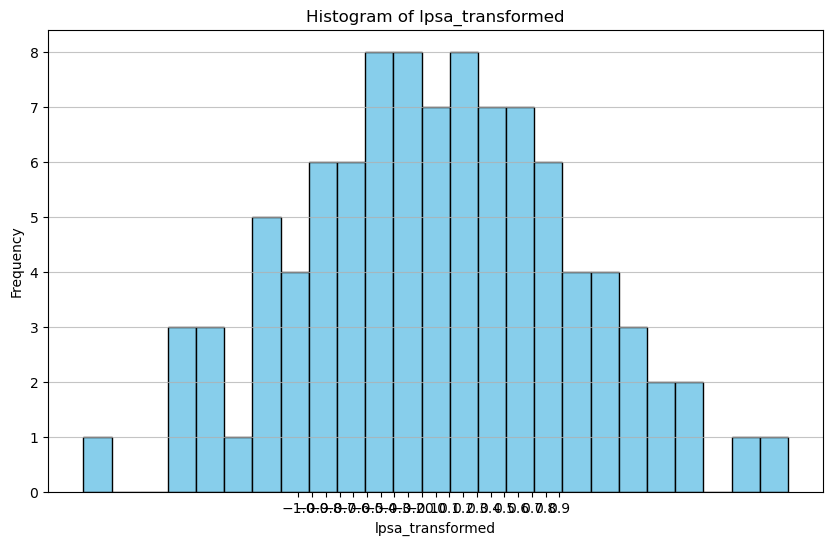

In [197]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(y_transformed , bins=25, color='skyblue', edgecolor='black')
plt.title('Histogram of lpsa_transformed')
plt.xlabel('lpsa_transformed')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(-1, 1, 0.1))
plt.show()

In [201]:
X = df.iloc[:, 0:8]
y = df['y_transformed']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42 )
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

R^2: 0.6226167365376198


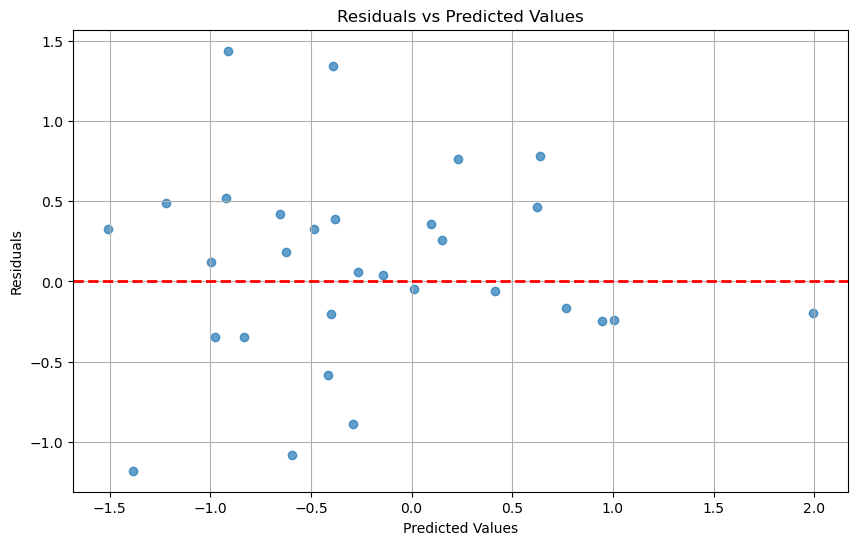

In [125]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2) 
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

In [139]:
#Ridge and lasso regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lambdas = np.logspace(-4, 4, 100)

best_ridge_lambda = None
best_lasso_lambda = None

best_ridge_mse = float('inf')
best_lasso_mse = float('inf')

for lambda_value in lambdas:
    
    # Ridge Regression
    ridge = Ridge(alpha=lambda_value, max_iter=10000)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    
    if ridge_mse < best_ridge_mse:
        best_ridge_mse = ridge_mse
        best_ridge_lambda = lambda_value
        best_ridge_model = ridge
    
    # Lasso Regression
    lasso = Lasso(alpha=lambda_value, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    
    if lasso_mse < best_lasso_mse:
        best_lasso_mse = lasso_mse
        best_lasso_lambda = lambda_value
        best_lasso_model = lasso

ridge_coefficients = best_ridge_model.coef_
lasso_coefficients = best_lasso_model.coef_


# Evaluate Ridge and Lasso models on training data
# Ridge Regression - Training MSE
ridge_train_pred = best_ridge_model.predict(X_train_scaled)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
print(f"Ridge Regression - Training MSE: {ridge_train_mse}")

# Lasso Regression - Training MSE
lasso_train_pred = best_lasso_model.predict(X_train_scaled)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
print(f"Lasso Regression - Training MSE: {lasso_train_mse}")

from sklearn.metrics import r2_score

# Ridge Regression - Training R^2
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
print(f"Ridge Regression - Training R^2: {ridge_train_r2}")

# Lasso Regression - Training R^2
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
print(f"Lasso Regression - Training R^2: {lasso_train_r2}")

# Ridge Regression - Test R^2
ridge_test_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Regression - Test R^2: {ridge_test_r2}")

# Lasso Regression - Test R^2
lasso_test_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso Regression - Test R^2: {lasso_test_r2}")



Ridge Regression - Training MSE: 0.36365381758141785
Lasso Regression - Training MSE: 0.3461281468649231
Ridge Regression - Training R^2: 0.6314653624606713
Lasso Regression - Training R^2: 0.6492262559062378
Ridge Regression - Test R^2: -0.009392818539169623
Lasso Regression - Test R^2: -0.03600847992700773


In [143]:
#Ridge and lasso regression with cross validation


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lambdas = np.logspace(-4, 4, 100)

# Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=lambdas, cv=5)  
ridge_cv.fit(X_train_scaled, y_train)
ridge_pred = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)

# Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=lambdas, cv=5, max_iter=10000)  # 5-fold cross-validation
lasso_cv.fit(X_train_scaled, y_train)
lasso_pred = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Ridge Regression - Training MSE, R^2, and Test R^2
ridge_train_pred = ridge_cv.predict(X_train_scaled)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)  # Training R^2
ridge_test_r2 = r2_score(y_test, ridge_pred)  # Test R^2

# Lasso Regression - Training MSE, R^2, and Test R^2
lasso_train_pred = lasso_cv.predict(X_train_scaled)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)  # Training R^2
lasso_test_r2 = r2_score(y_test, lasso_pred)  # Test R^2

# Output results for Ridge
print(f"Best Ridge Lambda (alpha): {ridge_cv.alpha_}")
print(f"Ridge Regression - Training MSE: {ridge_train_mse}, Training R^2: {ridge_train_r2}, Test MSE: {ridge_mse}, Test R^2: {ridge_test_r2}")

# Output results for Lasso
print(f"Best Lasso Lambda (alpha): {lasso_cv.alpha_}")
print(f"Lasso Regression - Training MSE: {lasso_train_mse}, Training R^2: {lasso_train_r2}, Test MSE: {lasso_mse}, Test R^2: {lasso_test_r2}")


Best Ridge Lambda (alpha): 12.328467394420684
Ridge Regression - Training MSE: 0.3520618918297003, Training R^2: 0.6432128705267335, Test MSE: 0.3301461128936313, Test R^2: 0.6532825857475187
Best Lasso Lambda (alpha): 0.08111308307896872
Lasso Regression - Training MSE: 0.3747217674466648, Training R^2: 0.6202488628814279, Test MSE: 0.37175020425026806, Test R^2: 0.609590225261831


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def forward_selection(X, y):
    remaining_features = list(X.columns) 
    selected_features = []  
    best_mse = np.inf
    final_model = None 

    while remaining_features:
        mse_with_candidates = []

        for feature in remaining_features:
            features_to_test = selected_features + [feature]  
            model = LinearRegression().fit(X[features_to_test], y)  
            yhat = model.predict(X[features_to_test]) 
            mse = mean_squared_error(y, yhat)  
            mse_with_candidates.append((mse, feature))  

        
        mse_with_candidates.sort(reverse=False) 
        best_mse_candidate, best_candidate = mse_with_candidates[0]  

        
        if best_mse_candidate < best_mse:
            best_mse = best_mse_candidate 
            selected_features.append(best_candidate) 
            remaining_features.remove(best_candidate)  
            final_model = LinearRegression().fit(X[selected_features], y)  

            r2_score = final_model.score(X[selected_features], y)
            print(f"Selected Features: {selected_features}, MSE: {best_mse}, R²: {r2_score}")
        else:
            break
            
    return final_model, selected_features

final_model, selected_features = forward_selection(df_X, df_y)

print("Final Selected Features:", selected_features)
print("Intercept:", final_model.intercept_)
print("Coefficients:", final_model.coef_)


Selected Features: ['lcavol'], MSE: 0.6073689077832388, R²: 0.5394319707818951
Selected Features: ['lcavol', 'lweight'], MSE: 0.5334244945257958, R²: 0.5955040420539791
Selected Features: ['lcavol', 'lweight', 'svi'], MSE: 0.48008697308435677, R²: 0.6359499009362206
Selected Features: ['lcavol', 'lweight', 'svi', 'lbph'], MSE: 0.4700564139220493, R²: 0.6435560770281128
Selected Features: ['lcavol', 'lweight', 'svi', 'lbph', 'age'], MSE: 0.45811012150641617, R²: 0.6526149542340809
Selected Features: ['lcavol', 'lweight', 'svi', 'lbph', 'age', 'pgg45'], MSE: 0.45129870086734536, R²: 0.657780056595613
Selected Features: ['lcavol', 'lweight', 'svi', 'lbph', 'age', 'pgg45', 'lcp'], MSE: 0.44440781402527924, R²: 0.6630054182032704
Selected Features: ['lcavol', 'lweight', 'svi', 'lbph', 'age', 'pgg45', 'lcp', 'gleason'], MSE: 0.4439012241002568, R²: 0.6633895654989246
Final Selected Features: ['lcavol', 'lweight', 'svi', 'lbph', 'age', 'pgg45', 'lcp', 'gleason']
Intercept: 0.1815608454689528


In [32]:
def backward_elimination(X, y):
    remaining_features = list(X.columns) 
    best_mse = np.inf
    final_model = None

    while remaining_features:
        mse_with_candidates = []
        model = LinearRegression().fit(X[remaining_features], y)
        y_pred = model.predict(X[remaining_features])
        mse = mean_squared_error(y, y_pred)
        mse_with_candidates.append((mse, None)) 
        
        for candidate in remaining_features:
            features_to_use = [f for f in remaining_features if f != candidate]
            model = LinearRegression().fit(X[features_to_use], y)
            y_pred = model.predict(X[features_to_use])
            mse = mean_squared_error(y, y_pred)
            mse_with_candidates.append((mse, candidate))
            
        mse_with_candidates.sort(key=lambda x: x[0])
        best_mse_candidate, worst_candidate = mse_with_candidates[0]
        
        if worst_candidate is not None and best_mse_candidate < best_mse:
            best_mse = best_mse_candidate
            remaining_features.remove(worst_candidate)
            print(f"Removed Feature: {worst_candidate}, MSE: {best_mse}")
        else:
            break 
    
    final_model = LinearRegression().fit(X[remaining_features], y)
    return final_model, remaining_features

final_model, remaining_features = backward_elimination(df_X,df_y)
print("Final Remaining Features:", remaining_features)
print("Intercept (بُعد ثابت):", final_model.intercept_)
print("Coefficients (ضرایب):", final_model.coef_)


Final Remaining Features: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
Intercept (بُعد ثابت): 0.1815608454689568
Coefficients (ضرایب): [ 0.56434128  0.62201979 -0.02124819  0.09671252  0.7616734  -0.10605094
  0.04922793  0.00445751]
